In [947]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("taweilo/fish-species-sampling-weight-and-height-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fish-species-sampling-weight-and-height-data


In [948]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
import warnings
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
sns.set()

In [949]:
df = pd.read_csv('/kaggle/input/fish-species-sampling-weight-and-height-data/fish_data.csv')
df.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


In [950]:
df.shape

(4080, 4)

In [951]:
df.isnull().sum()

species      0
length       0
weight       0
w_l_ratio    0
dtype: int64

In [952]:
df.duplicated().sum()

109

In [953]:
df.drop_duplicates(inplace = True)

In [954]:
df.shape

(3971, 4)

In [955]:
df['species'].value_counts()

species
Setipinna taty            476
Anabas testudineus        462
Otolithoides biauritus    456
Pethia conchonius         454
Polynemus paradiseus      454
Sillaginopsis panijus     429
Otolithoides pama         428
Coilia dussumieri         409
Puntius lateristriga      403
Name: count, dtype: int64

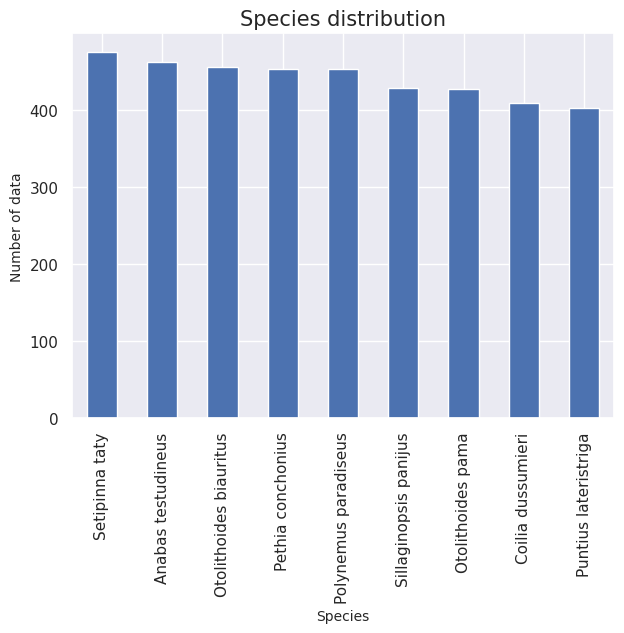

In [956]:
df['species'].value_counts().plot(kind = 'bar', figsize = (7, 5))
plt.title('Species distribution', fontsize = 15)
plt.xlabel('Species', fontsize = 10)
plt.ylabel('Number of data', fontsize = 10)
plt.show()

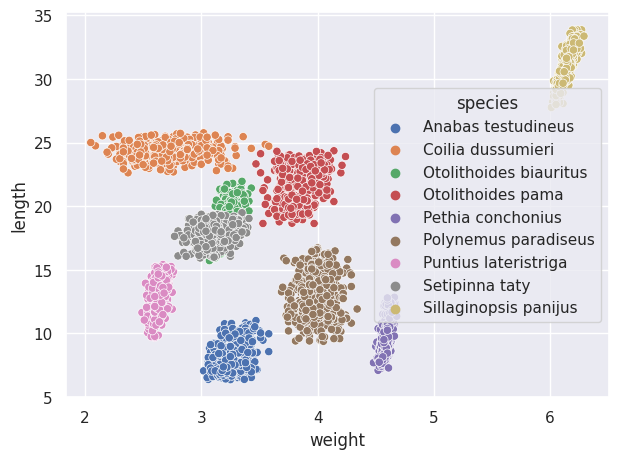

In [957]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = df, x = 'weight', y = 'length', hue = 'species')
plt.show()

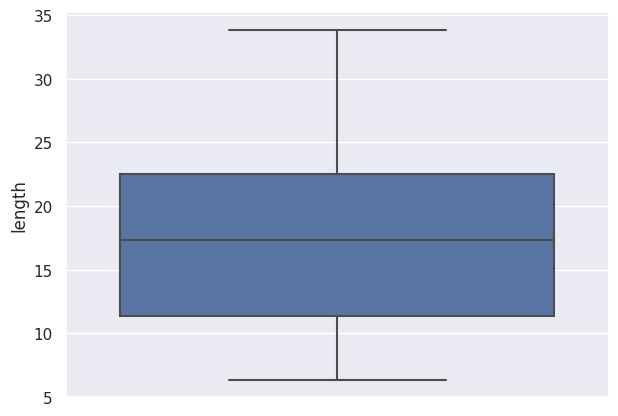

In [958]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = df, y = 'length')
plt.show()

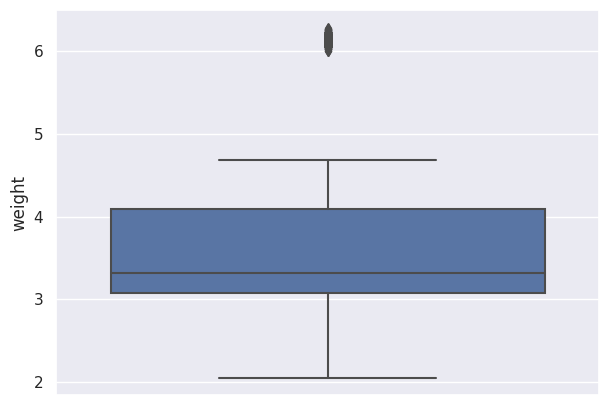

In [959]:
plt.figure(figsize = (7, 5))
sns.boxplot(data = df, y = 'weight')
plt.show()

In [960]:
X = df[['length', 'weight']]
X.head()

,length,weight
0,10.66,3.45
1,6.91,3.27
2,8.38,3.46
3,7.57,3.36
4,10.83,3.38


In [961]:
inertia_scores, silhouette = [], []
for i in range(2, 20):
    km = KMeans(n_clusters = i, init = 'k-means++')
    km.fit(X)
    inertia_scores.append(km.inertia_)
    silhouette.append(silhouette_score(X, km.labels_))

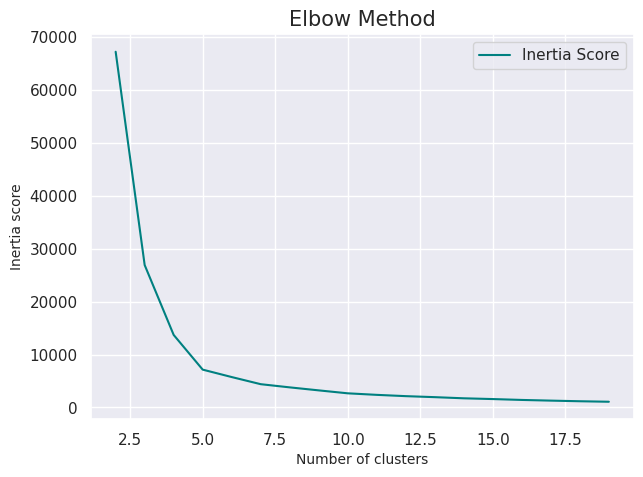

In [962]:
plt.figure(figsize = (7, 5))
plt.plot(range(2, 20), inertia_scores, label = 'Inertia Score', color = 'teal')
plt.title('Elbow Method', fontsize = 15)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Inertia score', fontsize = 10)
plt.legend()
plt.show()

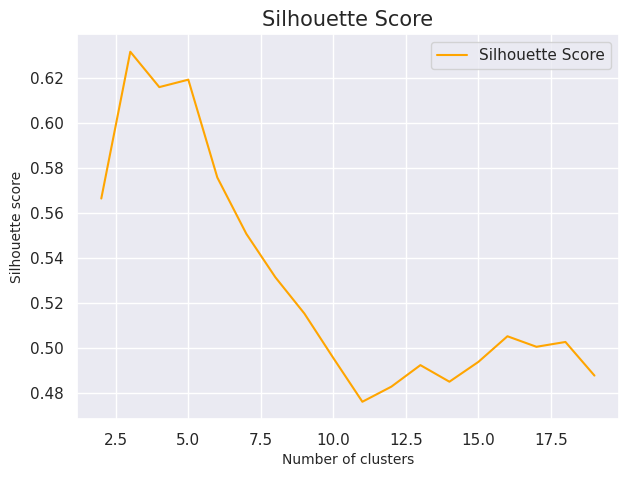

In [963]:
plt.figure(figsize = (7, 5))
plt.plot(range(2, 20), silhouette, label = 'Silhouette Score', color = 'orange')
plt.title('Silhouette Score', fontsize = 15)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette score', fontsize = 10)
plt.legend()
plt.show()

In [964]:
kmeans_model = KMeans(n_clusters = 5, init = 'k-means++')
kmeans_model.fit(X)
df['km_clusters'] = kmeans_model.labels_

In [965]:
df.head()

,species,length,weight,w_l_ratio,km_clusters
0,Anabas testudineus,10.66,3.45,0.32,4
1,Anabas testudineus,6.91,3.27,0.47,4
2,Anabas testudineus,8.38,3.46,0.41,4
3,Anabas testudineus,7.57,3.36,0.44,4
4,Anabas testudineus,10.83,3.38,0.31,4


In [966]:
df['km_clusters'].value_counts()

km_clusters
2    1064
4     912
0     834
1     732
3     429
Name: count, dtype: int64

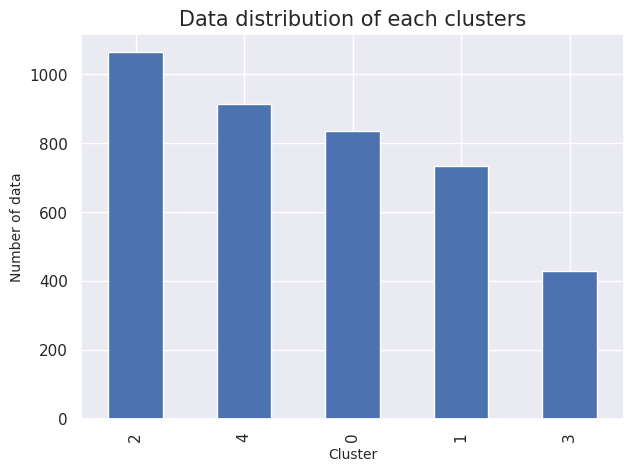

In [967]:
df['km_clusters'].value_counts().plot(kind = 'bar', figsize = (7, 5))
plt.title('Data distribution of each clusters', fontsize = 15)
plt.xlabel('Cluster', fontsize = 10)
plt.ylabel('Number of data', fontsize = 10)
plt.show()

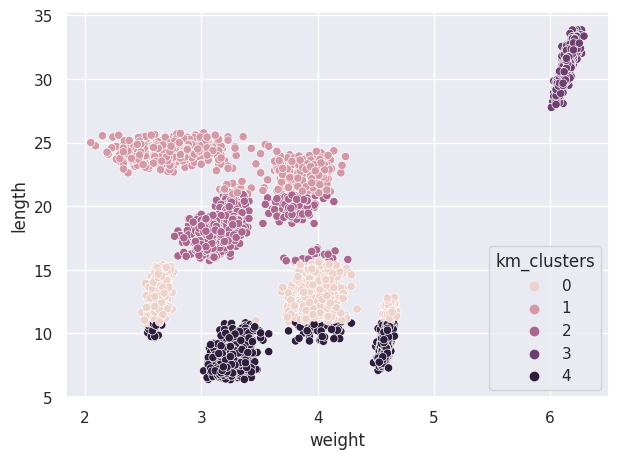

In [968]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = df, x = 'weight', y = 'length', hue = 'km_clusters')
plt.show()

In [969]:
scaler = StandardScaler()

In [970]:
X_scaled = scaler.fit_transform(X)

In [971]:
inertia_scores2, silhouette2 = [], []
for i in range(2, 20):
    km2 = KMeans(n_clusters = i, init = 'k-means++')
    km2.fit(X_scaled)
    inertia_scores2.append(km2.inertia_)
    silhouette2.append(silhouette_score(X_scaled, km2.labels_))

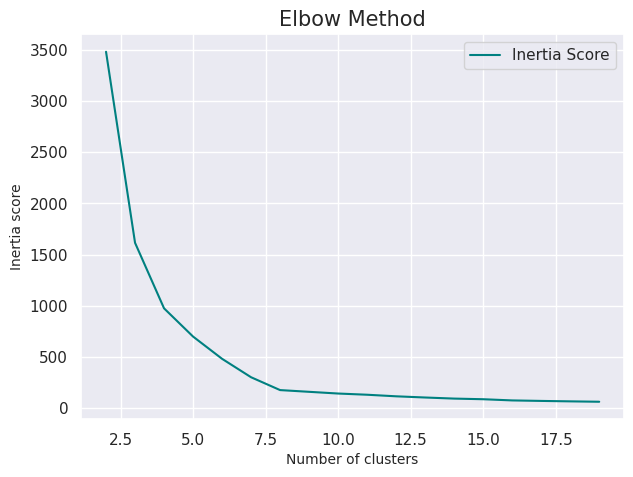

In [972]:
plt.figure(figsize = (7, 5))
plt.plot(range(2, 20), inertia_scores2, label = 'Inertia Score', color = 'teal')
plt.title('Elbow Method', fontsize = 15)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Inertia score', fontsize = 10)
plt.legend()
plt.show()

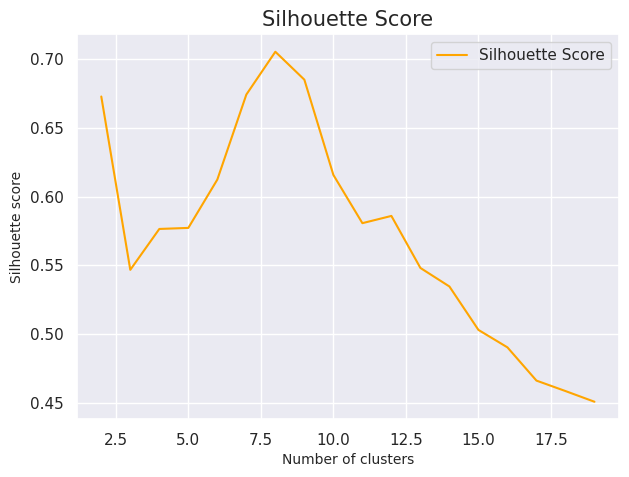

In [973]:
plt.figure(figsize = (7, 5))
plt.plot(range(2, 20), silhouette2, label = 'Silhouette Score', color = 'orange')
plt.title('Silhouette Score', fontsize = 15)
plt.xlabel('Number of clusters', fontsize = 10)
plt.ylabel('Silhouette score', fontsize = 10)
plt.legend()
plt.show()

In [974]:
kmeans_model2 = KMeans(n_clusters = 8, init = 'k-means++')
kmeans_model2.fit(X_scaled)
df['km_clusters_scaled'] = kmeans_model2.labels_

In [975]:
df.head()

,species,length,weight,w_l_ratio,km_clusters,km_clusters_scaled
0,Anabas testudineus,10.66,3.45,0.32,4,0
1,Anabas testudineus,6.91,3.27,0.47,4,0
2,Anabas testudineus,8.38,3.46,0.41,4,0
3,Anabas testudineus,7.57,3.36,0.44,4,0
4,Anabas testudineus,10.83,3.38,0.31,4,0


In [976]:
df['km_clusters_scaled'].value_counts()

km_clusters_scaled
3    929
0    462
4    462
7    446
1    434
2    429
5    406
6    403
Name: count, dtype: int64

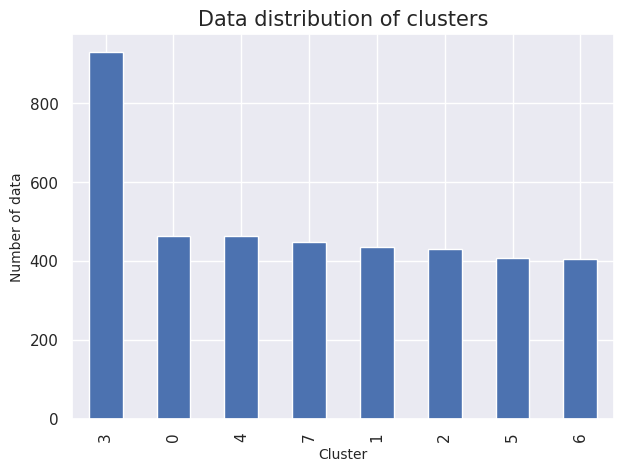

In [977]:
df['km_clusters_scaled'].value_counts().plot(kind = 'bar', figsize = (7, 5))
plt.title('Data distribution of clusters', fontsize = 15)
plt.xlabel('Cluster', fontsize = 10)
plt.ylabel('Number of data', fontsize = 10)
plt.show()

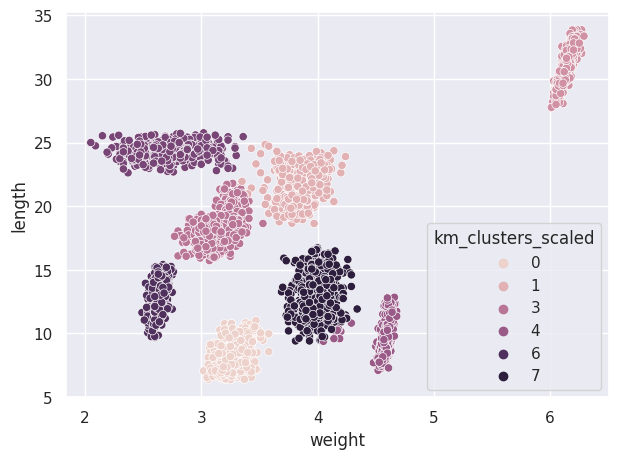

In [978]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = df, x = 'weight', y = 'length', hue = 'km_clusters_scaled')
plt.show()

In [979]:
km_model3 = KMeans(n_clusters = 9, init = 'k-means++')
km_model3.fit(X_scaled)
df['km_cluster_scaled2'] = km_model3.labels_

In [980]:
df['km_cluster_scaled2'].value_counts()

km_cluster_scaled2
3    929
1    462
4    454
0    434
2    429
5    406
6    403
7    229
8    225
Name: count, dtype: int64

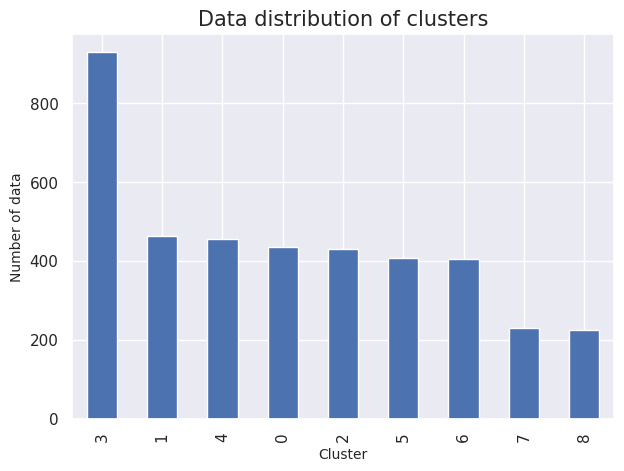

In [981]:
df['km_cluster_scaled2'].value_counts().plot(kind = 'bar', figsize = (7, 5))
plt.title('Data distribution of clusters', fontsize = 15)
plt.xlabel('Cluster', fontsize = 10)
plt.ylabel('Number of data', fontsize = 10)
plt.show()

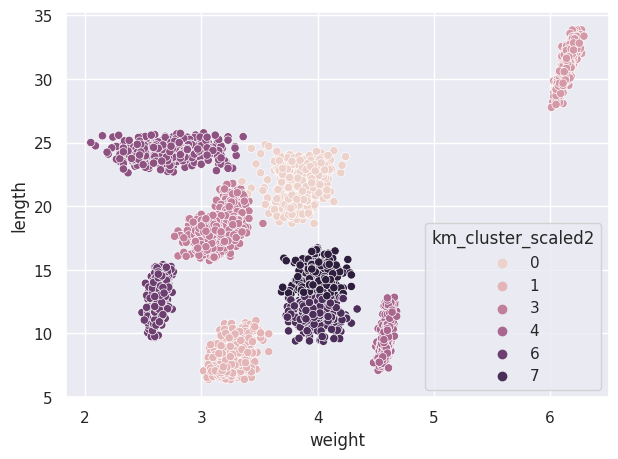

In [982]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = df, x = 'weight', y = 'length', hue = 'km_cluster_scaled2')
plt.show()

In [983]:
dbscan_model = DBSCAN(eps = 0.5, min_samples = 5, metric = 'euclidean')

In [984]:
dbscan_model.fit(X_scaled)

DBSCAN()

In [985]:
df['dbscan_clusters'] = dbscan_model.labels_

In [986]:
df['dbscan_clusters'].value_counts()

dbscan_clusters
0    3542
1     429
Name: count, dtype: int64

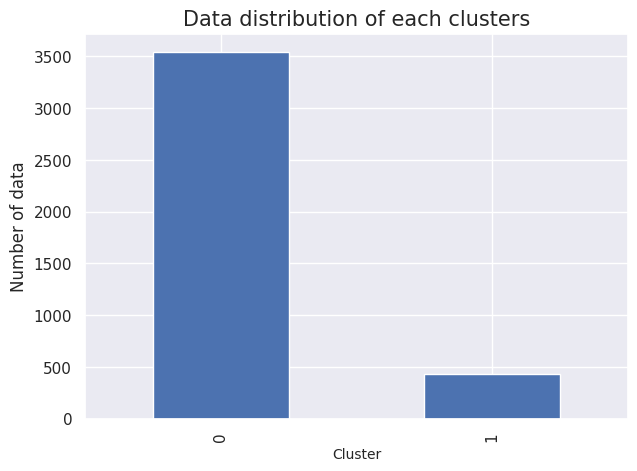

In [987]:
df['dbscan_clusters'].value_counts().plot(kind = 'bar', figsize = (7, 5))
plt.title('Data distribution of each clusters', fontsize = 15)
plt.xlabel('Cluster', fontsize = 10)
plt.ylabel('Number of data')
plt.show()

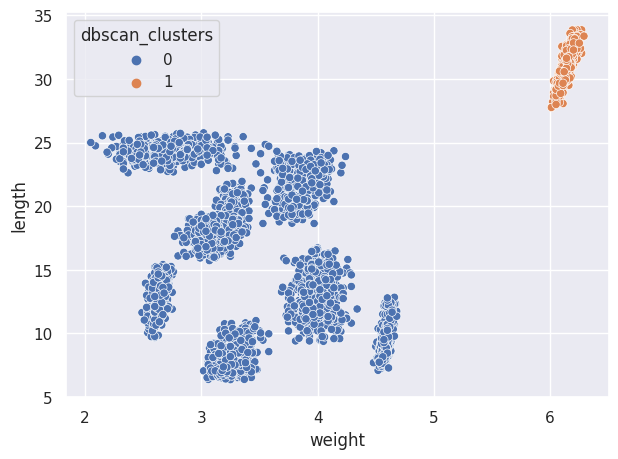

In [988]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = df, x = 'weight', y = 'length', hue = 'dbscan_clusters')
plt.show()

In [989]:
dbscan_model2 = DBSCAN(eps = 0.2, min_samples = 5, metric = 'euclidean')
dbscan_model2.fit(X_scaled)
df['dbscan_clusters2'] = dbscan_model2.labels_

In [990]:
df['dbscan_clusters2'].value_counts()

dbscan_clusters2
1    2172
0     916
2     454
3     429
Name: count, dtype: int64

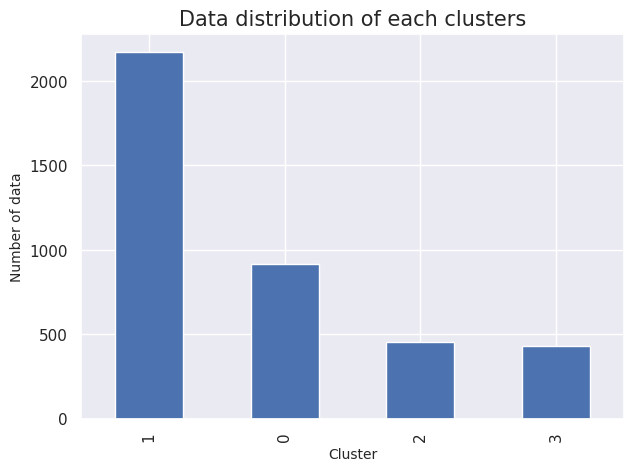

In [991]:
df['dbscan_clusters2'].value_counts().plot(kind = 'bar', figsize = (7, 5))
plt.title('Data distribution of each clusters', fontsize = 15)
plt.xlabel('Cluster', fontsize = 10)
plt.ylabel('Number of data', fontsize = 10)
plt.show()

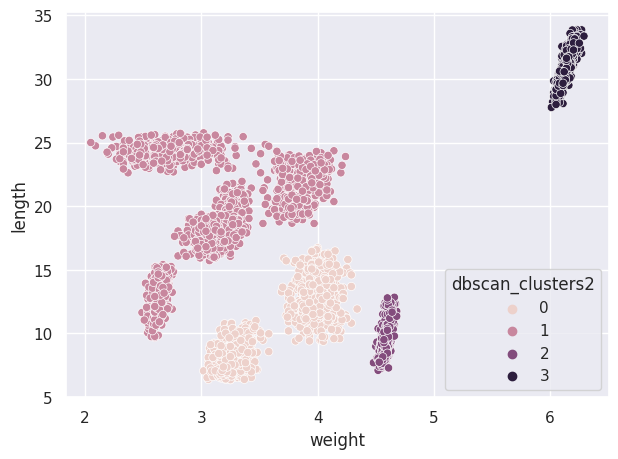

In [992]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = df, x = 'weight', y = 'length', hue = 'dbscan_clusters2')
plt.show()

In [993]:
dbscan_model3 = DBSCAN(eps = 0.1, min_samples = 5, metric = 'euclidean')
dbscan_model3.fit(X_scaled)
df['dbscan_clusters3'] = dbscan_model3.labels_

In [994]:
df['dbscan_clusters3'].value_counts()

dbscan_clusters3
 2    932
 0    462
 4    454
 5    452
 7    429
 3    420
 6    403
 1    399
-1     20
Name: count, dtype: int64

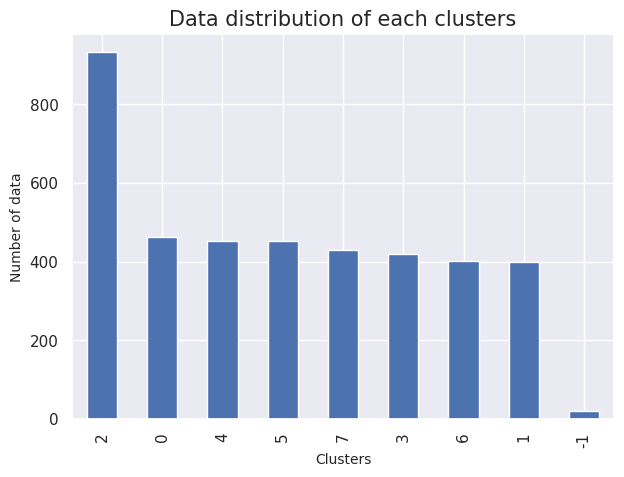

In [995]:
df['dbscan_clusters3'].value_counts().plot(kind = 'bar', figsize = (7, 5))
plt.title('Data distribution of each clusters', fontsize = 15)
plt.xlabel('Clusters', fontsize = 10)
plt.ylabel('Number of data', fontsize = 10)
plt.show()

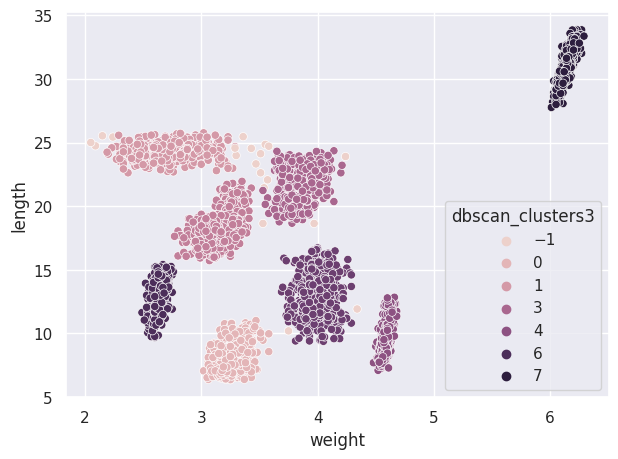

In [996]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = df, x = 'weight', y = 'length', hue = 'dbscan_clusters3')
plt.show()

In [997]:
df_1 = df[df['dbscan_clusters3'] != 2]
df_2 = df[df['dbscan_clusters3'] == 2]

In [998]:
df_2_1 = df_2[df_2['length'] >= 18]
df_2_2 = df_2[df_2['length'] < 18]

In [999]:
df_2_1['dbscan_clusters3'] = df_2_1['dbscan_clusters3'].replace(2, 8)

In [1000]:
df_2 = pd.concat([df_2_1, df_2_2])

In [1001]:
df_n = pd.concat([df_1, df_2])

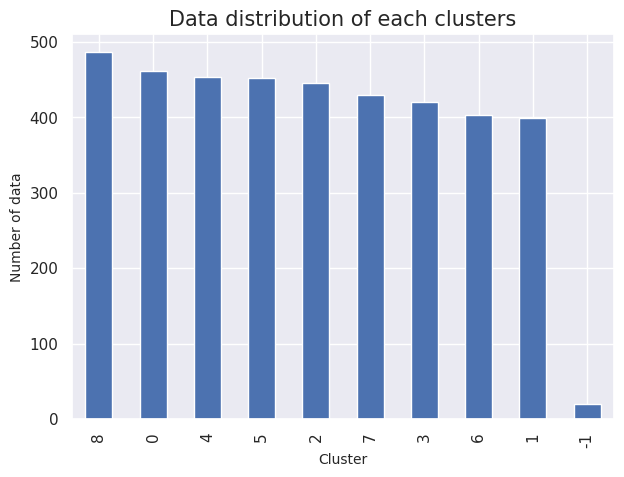

In [1002]:
df_n['dbscan_clusters3'].value_counts().plot(kind = 'bar', figsize = (7, 5))
plt.title('Data distribution of each clusters', fontsize = 15)
plt.xlabel('Cluster', fontsize = 10)
plt.ylabel('Number of data', fontsize = 10)
plt.show()

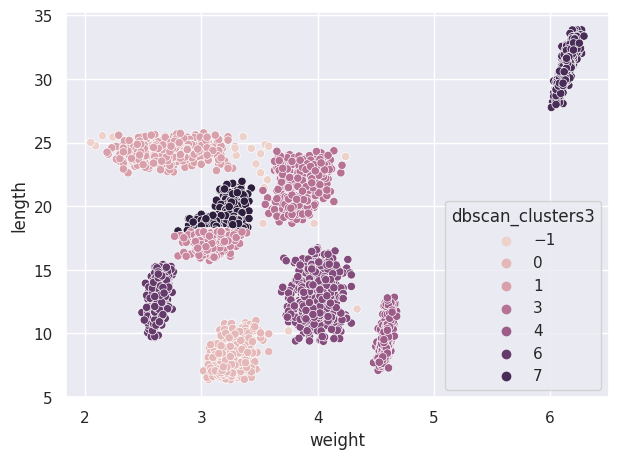

In [1003]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = df_n, x = 'weight', y = 'length', hue = 'dbscan_clusters3')
plt.show()

In [1007]:
df_n = df_n[df_n['dbscan_clusters3'] != -1]

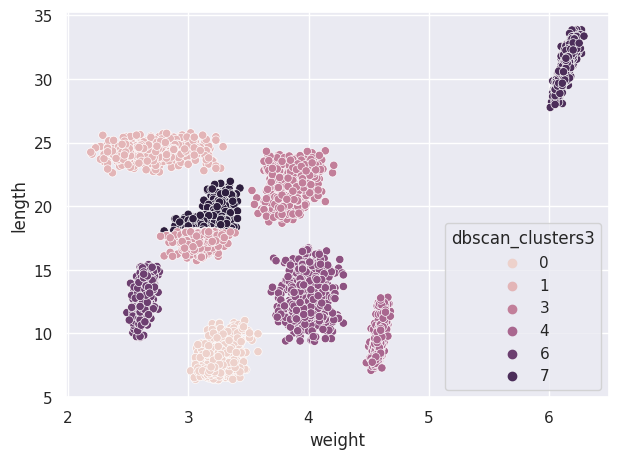

In [1008]:
plt.figure(figsize = (7, 5))
sns.scatterplot(data = df_n, x = 'weight', y = 'length', hue = 'dbscan_clusters3')
plt.show()